<a href="https://colab.research.google.com/github/hyejwon/1_ne/blob/main/%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0%EB%A5%BC_%EC%82%AC%EC%9A%A9%ED%95%9C_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 영화 리뷰 텍스트를 긍정 또는 부정으로 분류
# 예제는 이진(binary)또는 클래스(class)가 두 개인 분류 문제
# 이진 분류는 머신러닝에서 중요하고 널리 사용

# 인터넷 영화 데이터베이스에서 수집한 50,000개의 영화 리뷰 텍스트를 담은 IMDB 데이터셋 사용
# 25,000개의 리뷰는 훈련용으로 25,000개는 테스트용으로 나뉘어져있습니다. 훈련 세트와 테스트 세트의 클래스는 균형이 잡혀있음.
# 즉 긍정적인 리뷰와 부정적인 리뷰의 개수가 동일합니다.

# 이 노트북은 모델을 만들고 훈련하기 위해 텐서플로의 고수준 파이썬 API인 tf.keras를 사용 

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.4.1


In [4]:
#IMDB 데이터셋 다운로드
#IMDB 데이터셋은 텐서플로와 함께 제공. 리뷰(단어의 시퀀스(Sequence))는 미리 전처리해서 정수 시퀀스로 변환되어 있다.
#각 정수는 어휘 사전에 있는 특정 단어를 의미한다
#다음 코드는 IMDB 데이터셋을 컴퓨터에 다운로드 한다

In [5]:
imdb = keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
#매개변수 num_words=10000 은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택
#데이터 크기를 적당하게 유지하기위해 드물게 등장하는 단어는 제외 


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
#데이터 탐색: 이 데이터셋의 샘플은 전처리된 정수 배열입니다. 이 정수는 영화 리뷰에 나오는 단어를 나타냄
#레이블은(label)은 정수 0 또는 1
print("훈련 샘플:{},레이블{}".format(len(train_data),len(train_labels)))

훈련 샘플:25000,레이블25000


In [7]:
#리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어 있음.
#첫 번째 리뷰를 확인
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
#영화 리뷰들은 길이가 다름
#첫 번째 리뷰와 두 번째 리뷰에서 단어의 개수를 출력
#신경망의 입력은 길이가 같아야 하기 때문에 나중에 이 문제를 해결

len(train_data[0]),len(train_data[1]) #len() 데이터 길이 튜플 

(218, 189)

In [9]:
#정수를 단어로 다시 변환하기
#정수와 문자열을 매핑한 딕셔너리(dictionary)객체에 질의하는 헬퍼(helper)함수 생성

#단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
#처음 몇 개 인덱스는 사전에 정의되어 있음
word_index = {k:(v+3) for k,v in word_index.items()} #data value 에 3을 더해줌
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2 #unknown
word_index["<UNUSED>"]=3

reverse_word_index=dict([(value,key) for (key,value) in word_index.items()]) #.items():for 문에서 key 와 value 같이 돌리는 함수

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?')for i in text]) 

In [11]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
#데이터 준비
#리뷰-정수 배열은 신경망에 주입하기 전에 텐서로 변환 되어야 한다. 
##1.원 핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환
###배열[3,5]을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있음
###그 다음 실수 벡터 데이터를 다룰 수 있는 dense층을 신경망의 첫번째 층으로 사용
###이 방법은 num_words*num_reviews 크기의 행렬이 필요하기 때문에 메모리를 많이 사용
##2.다른 방법으로는,정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 max_length*num_reviews
###크기의 정수 텐서를 만듦. 이런 형ㅌㅐ의 텐서를 다룰 수 있는 임베딩(embedding)층을 신경망의 첫 번째 층으로 사용


In [13]:
#이 튜토리얼에서는 두 번째 방식을 사용, 영화 리뷰의 길이가 같아야 하므로 pad_sequences함수를 사용해 길이를 맞춤
train_data=keras.preprocessing.sequence.pad_sequences(train_data,
                                                      value=word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,
                                                     value=word_index["<PAD>"],
                                                     padding='post',
                                                     maxlen=256)



In [14]:
#샘플 길이 확인
len(train_data[0]),len(train_data[0])

(256, 256)

In [15]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [16]:
#모델 구성
##신경망은 층(layer)을 쌓아서 만듦
###1.모델에서 얼마나 많은 층을 사용할 것인가?
###2.각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?


In [17]:
#이 예제의 입력 데이터는 단어 인덱스의 배열입니다. 예측할 레이블은 0또는 1


In [18]:
#입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다 (10,000개의 단어)

vocab_size=10000

model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16,input_shape=(None,)))#첫번째 층 
model.add(keras.layers.GlobalAveragePooling1D()) #길이가 다른 입력을 다루는 가장 간단한 방법
model.add(keras.layers.Dense(16,activation='relu'))##16개 hidden unit
model.add(keras.layers.Dense(1,activation='sigmoid')) ##1개 출력 노드 0<=sigmoid<=1

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [19]:
#손실함수와 옵티마이저
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
#검증 세트 만들기
##모델을 훈련할 때 모델이 만난 적 없는 데이터에서 정확도를 확인하는 것이 좋음 
##원본 훈련 데이터에서 10,000개의 샘플을 떼어내어 검증세트(validation set)를 만듦

x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]


In [21]:
#모델 훈련
##이 모델을 512개의 샘플로 이루어진 미니배치에서 40번의 에포크 동안 훈련합니다.
#x_train과 y_train 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻
#훈련하는 동안 10,000개의 검증 세트에서 모델의 손실과 정확도를 모니터링 합니다.

history=model.fit(partial_x_train,
                partial_y_train,
                epochs=40,
                batch_size=512,
                validation_data=(x_val,y_val),
                verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 33ms/step - loss: 0.6929 - accuracy: 0.5056 - val_loss: 0.6916 - val_accuracy: 0.6372
Epoch 2/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6906 - accuracy: 0.6449 - val_loss: 0.6871 - val_accuracy: 0.7490
Epoch 3/40
30/30 [==============================] - 1s 22ms/step - loss: 0.6845 - accuracy: 0.7521 - val_loss: 0.6776 - val_accuracy: 0.7444
Epoch 4/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6728 - accuracy: 0.7617 - val_loss: 0.6612 - val_accuracy: 0.7543
Epoch 5/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6527 - accuracy: 0.7778 - val_loss: 0.6367 - val_accuracy: 0.7674
Epoch 6/40
30/30 [==============================] - 1s 21ms/step - loss: 0.6240 - accuracy: 0.7926 - val_loss: 0.6053 - val_accuracy: 0.7882
Epoch 7/40
30/30 [==============================] - 1s 20ms/step - loss: 0.5876 - accuracy: 0.8080 - val_loss: 0.5692 - val_accuracy: 0.8032
Epoch 8/40
30

In [22]:
#모델 평가
results = model.evaluate(test_data, test_labels, verbose=2)
print(results)

782/782 - 1s - loss: 0.3105 - accuracy: 0.8750
[0.3104551434516907, 0.8749600052833557]


In [23]:
#정확도와 손실 그래프 그리기
history_dict=history.history #model.fit 은 history 객체를 반환합니다. 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리가 들어있다.
history_dict.keys()# 이 네개의 지표는 훈련과 검증 단계에서 모니터링 하는 지표

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show>

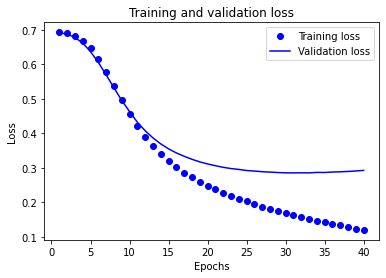

In [24]:
import matplotlib.pyplot as plt

acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs= range (1,41)

#bo 는 파란색 점
plt.plot(epochs,loss,'bo',label ='Training loss')
#b는 파란 실선
plt.plot(epochs,val_loss,'b',label ='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

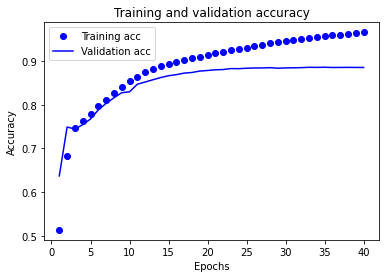

In [25]:
plt.clf()

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()